In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as ps

In [69]:
data = pd.read_csv('datasets/energydata_complete.csv')
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [70]:
data.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [71]:
df1 = data.rename(columns= {
                                'date': 'date_time',
                                'Appliances': 'a_energy',
                                'lights': 'l_energy',
                                'T1': 'kitchen_temp',
                                'RH_1': 'kitchen_hum',
                                'T2': 'liv_temp',
                                'RH_2': 'liv_hum',
                                'T3': 'laun_temp',
                                'RH_3': 'laun_hum',
                                'T4': 'off_temp',
                                'RH_4': 'off_hum',
                                'T5': 'bath_temp',
                                'RH_5': 'bath_hum',
                                'T6': 'out_b_temp',
                                'RH_6': 'out_b_hum',
                                'T7': 'iron_temp',
                                'RH_7': 'iron_hum',
                                'T8': 'teen_temp',
                                'RH_8': 'teen_hum',
                                'T9': 'par_temp',
                                'RH_9': 'par_hum',
                                'T_out': 'out_temp',
                                'Press_mm_hg': 'out_press',
                                'RH_out': 'out_hum',
                                'Windspeed': 'wind',
                                'Visibility': 'visibility',
                                'Tdewpoint': 'dew_point',
                                'rv1': 'rv1',
                                'rv2': 'rv2'

})

In [72]:
df1.head()

,date_time,a_energy,l_energy,kitchen_temp,kitchen_hum,liv_temp,liv_hum,laun_temp,laun_hum,off_temp,...,par_temp,par_hum,out_temp,out_press,out_hum,wind,visibility,dew_point,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [73]:
df1.tail()

,date_time,a_energy,l_energy,kitchen_temp,kitchen_hum,liv_temp,liv_hum,laun_temp,laun_hum,off_temp,...,par_temp,par_hum,out_temp,out_press,out_hum,wind,visibility,dew_point,rv1,rv2
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.7,...,23.2,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.7,...,23.2,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,...,23.2,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,...,23.2,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784
19734,2016-05-27 18:00:00,430,10,25.500000,46.600000,25.264286,42.971429,26.823333,41.156667,24.7,...,23.2,46.8450,22.200000,755.2,57.000000,4.000000,27.000000,13.200000,34.118851,34.118851


In [74]:
df1.describe()

,a_energy,l_energy,kitchen_temp,kitchen_hum,liv_temp,liv_hum,laun_temp,laun_hum,off_temp,off_hum,...,par_temp,par_hum,out_temp,out_press,out_hum,wind,visibility,dew_point,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


C:\Users\acer\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


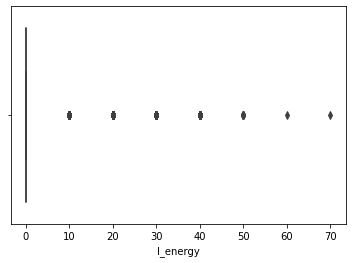

In [75]:
#analyzing light energy consumption column
lights_box = sns.boxplot(df1.l_energy)

In [76]:
l = [0, 10, 20, 30, 40, 50, 60, 70]

In [77]:
counts = []

In [78]:
for i in l:
    a = (df1.l_energy == i).sum()
    counts.append(a)

In [79]:
counts

[15252, 2212, 1624, 559, 77, 9, 1, 1]

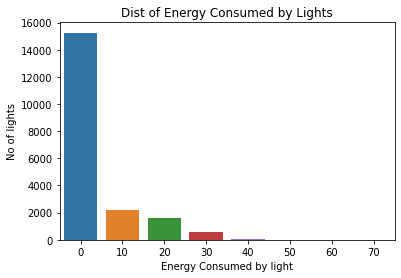

In [80]:

lights = sns.barplot(x=l, y=counts)
lights.set_title('Dist of Energy Consumed by Lights')
lights.set_xlabel('Energy Consumed by light')
lights.set_ylabel('No of lights')
plt.show()

In [81]:
((df1.l_energy == 0).sum()/(df1.shape[0])) * 100

77.28401317456296

In [82]:
#so 77% of instances have 0Wh. l_energy col is quite useless because we can't possibly find any links between it and other data.so let create new df
new_data = df1

In [83]:
new_data.drop(['l_energy'], axis=1, inplace=True)

In [84]:
new_data.head()

,date_time,a_energy,kitchen_temp,kitchen_hum,liv_temp,liv_hum,laun_temp,laun_hum,off_temp,off_hum,...,par_temp,par_hum,out_temp,out_press,out_hum,wind,visibility,dew_point,rv1,rv2
0,2016-01-11 17:00:00,60,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


C:\Users\acer\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='a_energy'>

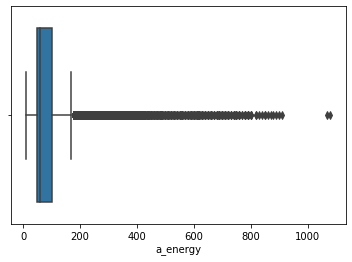

In [85]:
#analyzing the appliance energy consumptions

sns.boxplot(new_data.a_energy)

In [86]:
(new_data.a_energy > 200).sum()

1916

In [87]:
((new_data.a_energy > 200).sum()/(new_data.shape[0])) *100

9.708639473017481

In [88]:
((new_data.a_energy > 950).sum()/(new_data.shape[0])) *100

0.010134279199391943

In [89]:
energy = new_data

In [90]:
energy = energy[(energy['a_energy'] <= 200)]

In [91]:
energy.describe()

,a_energy,kitchen_temp,kitchen_hum,liv_temp,liv_hum,laun_temp,laun_hum,off_temp,off_hum,bath_temp,...,par_temp,par_hum,out_temp,out_press,out_hum,wind,visibility,dew_point,rv1,rv2
count,17819.000000,17819.000000,17819.000000,17819.000000,17819.000000,17819.000000,17819.000000,17819.000000,17819.000000,17819.000000,...,17819.000000,17819.000000,17819.000000,17819.000000,17819.000000,17819.000000,17819.000000,17819.000000,17819.000000,17819.000000
mean,68.728324,21.687676,40.158323,20.294921,40.470961,22.230049,39.167393,20.858577,38.991000,19.607705,...,19.502262,41.556127,7.315671,755.559383,80.236718,3.975014,38.306600,3.762120,25.002765,25.002765
std,31.378141,1.605252,3.933742,2.172435,4.062130,1.971209,3.223465,2.048053,4.324842,1.838655,...,2.011673,4.164766,5.290522,7.345043,14.771215,2.448213,11.951954,4.186178,14.519549,14.519549
min,10.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,...,14.890000,29.166667,-5.000000,729.366667,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,20.760000,37.260000,18.790000,37.930000,20.790000,36.826667,19.566667,35.500000,18.290000,...,18.066667,38.530000,3.533333,751.000000,71.166667,2.000000,29.000000,0.933333,12.461009,12.461009
50%,60.000000,21.600000,39.560000,19.926667,40.560000,22.100000,38.471429,20.666667,38.363333,19.390000,...,19.390000,40.863333,6.850000,756.100000,84.333333,3.500000,40.000000,3.433333,24.940753,24.940753
75%,80.000000,22.600000,42.900000,21.472333,43.326667,23.290000,41.590000,22.100000,42.090000,20.600000,...,20.600000,44.296667,10.333333,760.933333,91.845238,5.333333,40.000000,6.550000,37.660263,37.660263
max,200.000000,26.200000,59.633333,29.856667,56.026667,29.200000,49.656667,26.200000,51.000000,25.795000,...,24.500000,53.326667,26.100000,772.283333,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [92]:
#performing feature engineering
new_en = energy

In [93]:
new_en['date_time'] = pd.to_datetime(new_en.date_time, format = '%Y-%m-%d %H:%M:%S')

C:\Users\acer\AppData\Roaming\Python\Python39\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [94]:
new_en.head()

,date_time,a_energy,kitchen_temp,kitchen_hum,liv_temp,liv_hum,laun_temp,laun_hum,off_temp,off_hum,...,par_temp,par_hum,out_temp,out_press,out_hum,wind,visibility,dew_point,rv1,rv2
0,2016-01-11 17:00:00,60,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [95]:
new_en.insert(loc=1, column='month', value= (new_en.date_time.dt.month))

In [97]:
new_en.insert(loc=2, column='day', value=(new_en.date_time.dt.dayofweek) + 1 )

In [98]:
new_en.head()

,date_time,month,day,a_energy,kitchen_temp,kitchen_hum,liv_temp,liv_hum,laun_temp,laun_hum,...,par_temp,par_hum,out_temp,out_press,out_hum,wind,visibility,dew_point,rv1,rv2
0,2016-01-11 17:00:00,1,1,60,19.89,47.596667,19.2,44.790000,19.79,44.730000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,1,1,60,19.89,46.693333,19.2,44.722500,19.79,44.790000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,1,1,50,19.89,46.300000,19.2,44.626667,19.79,44.933333,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,1,1,50,19.89,46.066667,19.2,44.590000,19.79,45.000000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,1,1,60,19.89,46.333333,19.2,44.530000,19.79,45.000000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [99]:
#visualizing the dataset
import plotly.graph_objects as go

In [100]:
app_date = go.Scatter(x = new_en.date_time, mode='lines', y= new_en.a_energy)

layout = go.Layout(title='Appliance Energy consumed by Date', xaxis= dict(title='Date'), yaxis= dict(title='Wh'))

fig = go.Figure(data = [app_date], layout= layout)
fig.show()

In [101]:
app_month = new_en.groupby(by = ['month'], as_index=False)['a_energy'].sum()

In [102]:
app_month

,month,a_energy
0,1,150060
1,2,258270
2,3,283190
3,4,274030
4,5,259120


In [103]:
app_month.sort_values(by='a_energy', ascending=False).head()

,month,a_energy
2,3,283190
3,4,274030
4,5,259120
1,2,258270
0,1,150060


C:\Users\acer\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



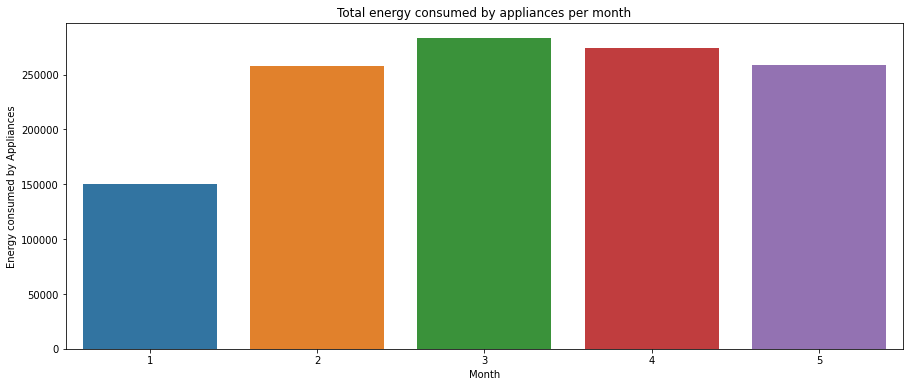

In [104]:
plt.subplots(figsize=(15,6))
am = sns.barplot(app_month.month, app_month.a_energy)
plt.xlabel('Month')
plt.ylabel('Energy consumed by Appliances')
plt.title('Total energy consumed by appliances per month')
plt.show()

In [109]:
app_day = new_en.groupby('day', as_index=False)['a_energy'].sum()

In [110]:
app_day

,day,a_energy
0,1,161190
1,2,175930
2,3,191700
3,4,177830
4,5,161170
5,6,173640
6,7,183210


In [112]:
app_day.sort_values('a_energy', ascending=False).head()

,day,a_energy
2,3,191700
6,7,183210
3,4,177830
1,2,175930
5,6,173640


C:\Users\acer\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



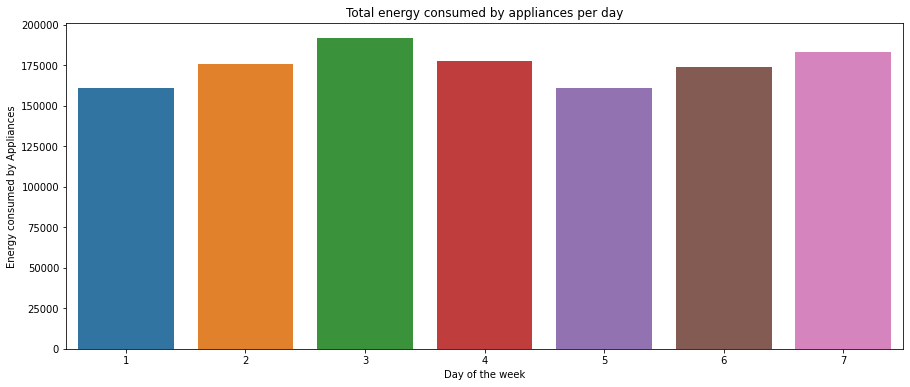

In [113]:
plt.subplots(figsize=(15,6))
am = sns.barplot(app_day.day, app_day.a_energy)
plt.xlabel('Day of the week')
plt.ylabel('Energy consumed by Appliances')
plt.title('Total energy consumed by appliances per day')
plt.show()

In [114]:
#plotting distribution of the temperature columns
col_temp = ['kitchen_temp', 'liv_temp', 'laun_temp', 'off_temp', 'bath_temp', 'out_b_temp', 'iron_temp', 'teen_temp', 'par_temp']

In [115]:
temp = new_en[col_temp]
temp.head()

,kitchen_temp,liv_temp,laun_temp,off_temp,bath_temp,out_b_temp,iron_temp,teen_temp,par_temp
0,19.89,19.2,19.79,19.000000,17.166667,7.026667,17.200000,18.2,17.033333
1,19.89,19.2,19.79,19.000000,17.166667,6.833333,17.200000,18.2,17.066667
2,19.89,19.2,19.79,18.926667,17.166667,6.560000,17.200000,18.2,17.000000
3,19.89,19.2,19.79,18.890000,17.166667,6.433333,17.133333,18.1,17.000000
4,19.89,19.2,19.79,18.890000,17.200000,6.366667,17.200000,18.1,17.000000


array([[<AxesSubplot:title={'center':'kitchen_temp'}>,
        <AxesSubplot:title={'center':'liv_temp'}>,
        <AxesSubplot:title={'center':'laun_temp'}>],
       [<AxesSubplot:title={'center':'off_temp'}>,
        <AxesSubplot:title={'center':'bath_temp'}>,
        <AxesSubplot:title={'center':'out_b_temp'}>],
       [<AxesSubplot:title={'center':'iron_temp'}>,
        <AxesSubplot:title={'center':'teen_temp'}>,
        <AxesSubplot:title={'center':'par_temp'}>]], dtype=object)

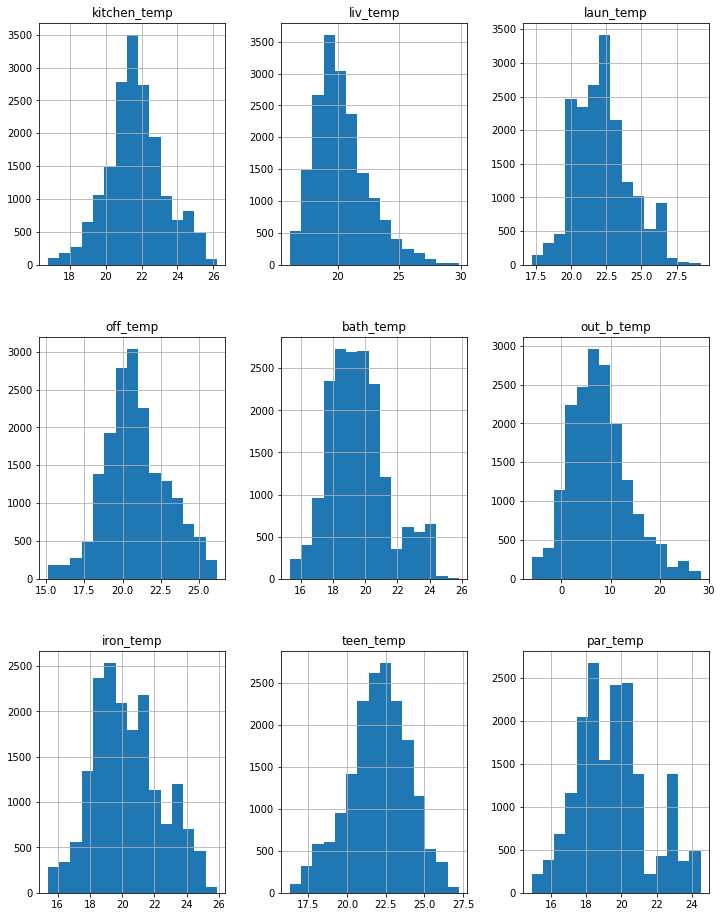

In [116]:
temp.hist(bins= 15, figsize=(12,16))

In [118]:
#plotting dist of humid columns
new_en.columns

Index(['date_time', 'month', 'day', 'a_energy', 'kitchen_temp', 'kitchen_hum',
       'liv_temp', 'liv_hum', 'laun_temp', 'laun_hum', 'off_temp', 'off_hum',
       'bath_temp', 'bath_hum', 'out_b_temp', 'out_b_hum', 'iron_temp',
       'iron_hum', 'teen_temp', 'teen_hum', 'par_temp', 'par_hum', 'out_temp',
       'out_press', 'out_hum', 'wind', 'visibility', 'dew_point', 'rv1',
       'rv2'],
      dtype='object')

In [119]:
col_hum = ['kitchen_hum', 'liv_hum', 'laun_hum', 'off_hum', 'bath_hum', 'out_b_hum', 'iron_hum', 'teen_hum', 'par_hum', 'out_hum']

In [120]:
hum = new_en[col_hum]

In [121]:
hum.head()

,kitchen_hum,liv_hum,laun_hum,off_hum,bath_hum,out_b_hum,iron_hum,teen_hum,par_hum,out_hum
0,47.596667,44.790000,44.730000,45.566667,55.20,84.256667,41.626667,48.900000,45.53,92.0
1,46.693333,44.722500,44.790000,45.992500,55.20,84.063333,41.560000,48.863333,45.56,92.0
2,46.300000,44.626667,44.933333,45.890000,55.09,83.156667,41.433333,48.730000,45.50,92.0
3,46.066667,44.590000,45.000000,45.723333,55.09,83.423333,41.290000,48.590000,45.40,92.0
4,46.333333,44.530000,45.000000,45.530000,55.09,84.893333,41.230000,48.590000,45.40,92.0


array([[<AxesSubplot:title={'center':'kitchen_hum'}>,
        <AxesSubplot:title={'center':'liv_hum'}>,
        <AxesSubplot:title={'center':'laun_hum'}>],
       [<AxesSubplot:title={'center':'off_hum'}>,
        <AxesSubplot:title={'center':'bath_hum'}>,
        <AxesSubplot:title={'center':'out_b_hum'}>],
       [<AxesSubplot:title={'center':'iron_hum'}>,
        <AxesSubplot:title={'center':'teen_hum'}>,
        <AxesSubplot:title={'center':'par_hum'}>],
       [<AxesSubplot:title={'center':'out_hum'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

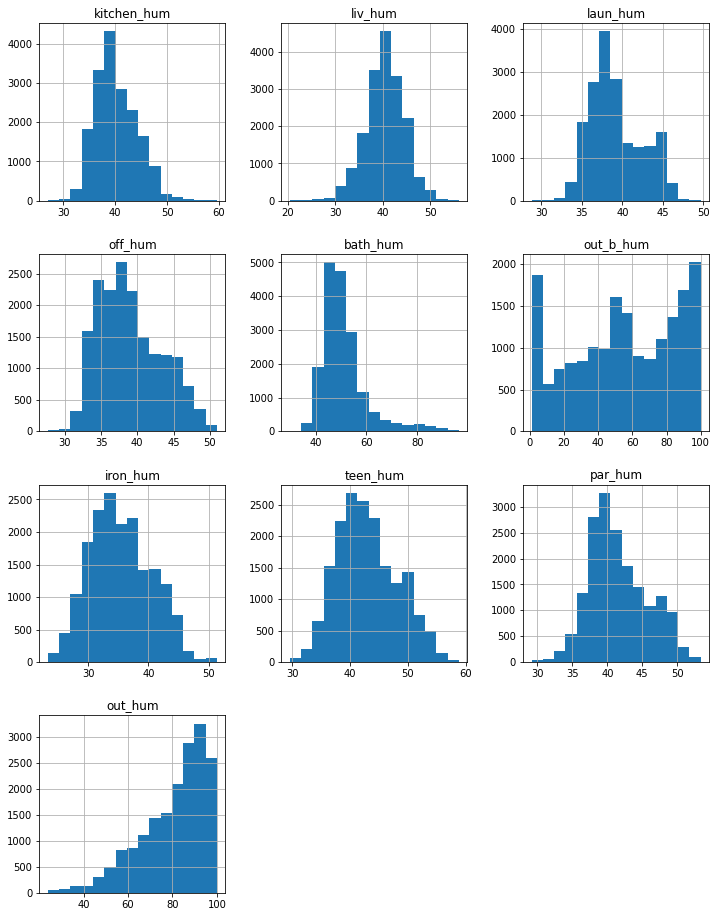

In [122]:
hum.hist(figsize=(12, 16), bins=15)

In [123]:
weather_col = ['out_temp', 'dew_point', 'out_hum', 'out_press', 'wind', 'visibility']
weather = new_en[weather_col]
weather.head()

,out_temp,dew_point,out_hum,out_press,wind,visibility
0,6.600000,5.3,92.0,733.5,7.000000,63.000000
1,6.483333,5.2,92.0,733.6,6.666667,59.166667
2,6.366667,5.1,92.0,733.7,6.333333,55.333333
3,6.250000,5.0,92.0,733.8,6.000000,51.500000
4,6.133333,4.9,92.0,733.9,5.666667,47.666667


array([[<AxesSubplot:title={'center':'out_temp'}>,
        <AxesSubplot:title={'center':'dew_point'}>],
       [<AxesSubplot:title={'center':'out_hum'}>,
        <AxesSubplot:title={'center':'out_press'}>],
       [<AxesSubplot:title={'center':'wind'}>,
        <AxesSubplot:title={'center':'visibility'}>]], dtype=object)

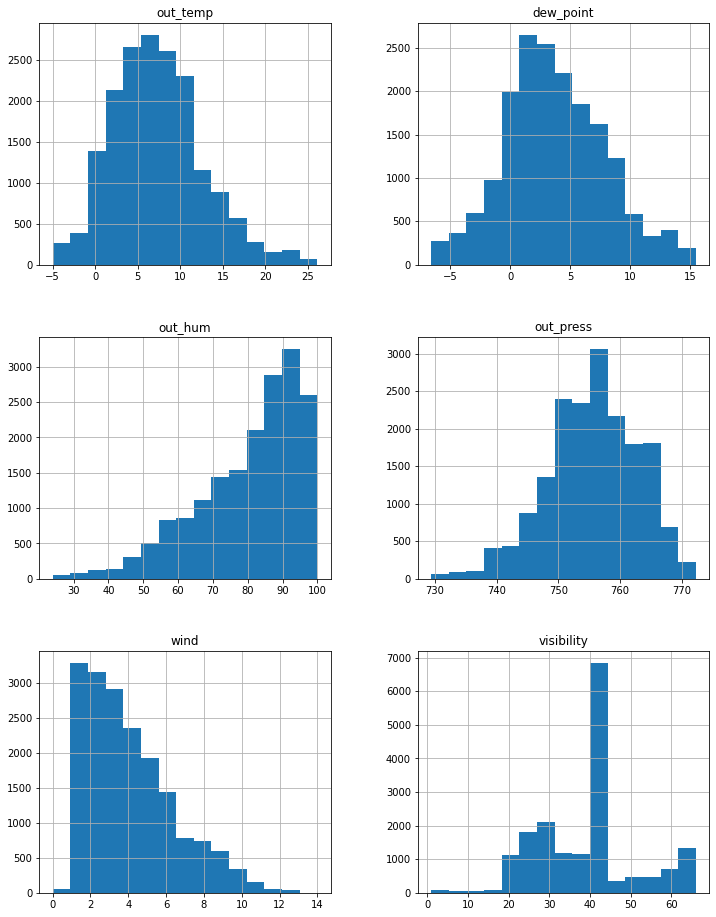

In [124]:
weather.hist(bins=15, figsize=(12,16))

C:\Users\acer\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\acer\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\acer\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for 

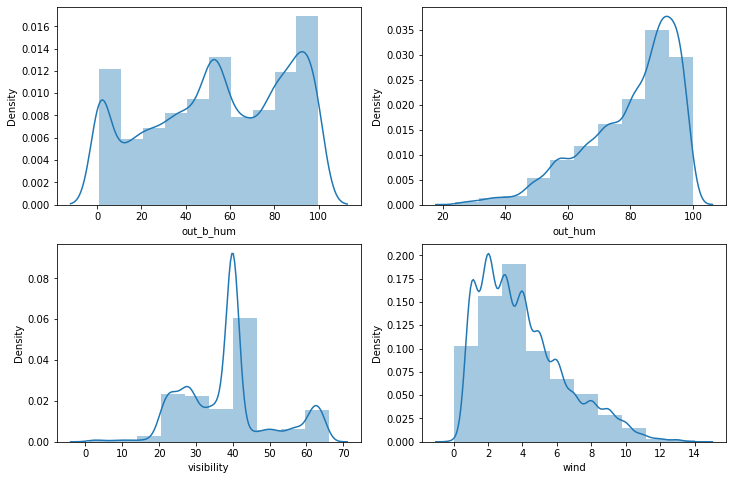

In [125]:
#plot out_b, out_hum, visibility and wind
f, ax = plt.subplots(2, 2, figsize=(12,8))
obh = sns.distplot(hum['out_b_hum'], bins=10, ax = ax[0][0])
oh = sns.distplot(weather['out_hum'], bins=10, ax = ax[0][1])
vis = sns.distplot(weather['visibility'], bins=10, ax = ax[1][0])
wind = sns.distplot(weather['wind'], bins=10, ax = ax[1][1])

In [126]:
corr = new_en.corr()

In [127]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

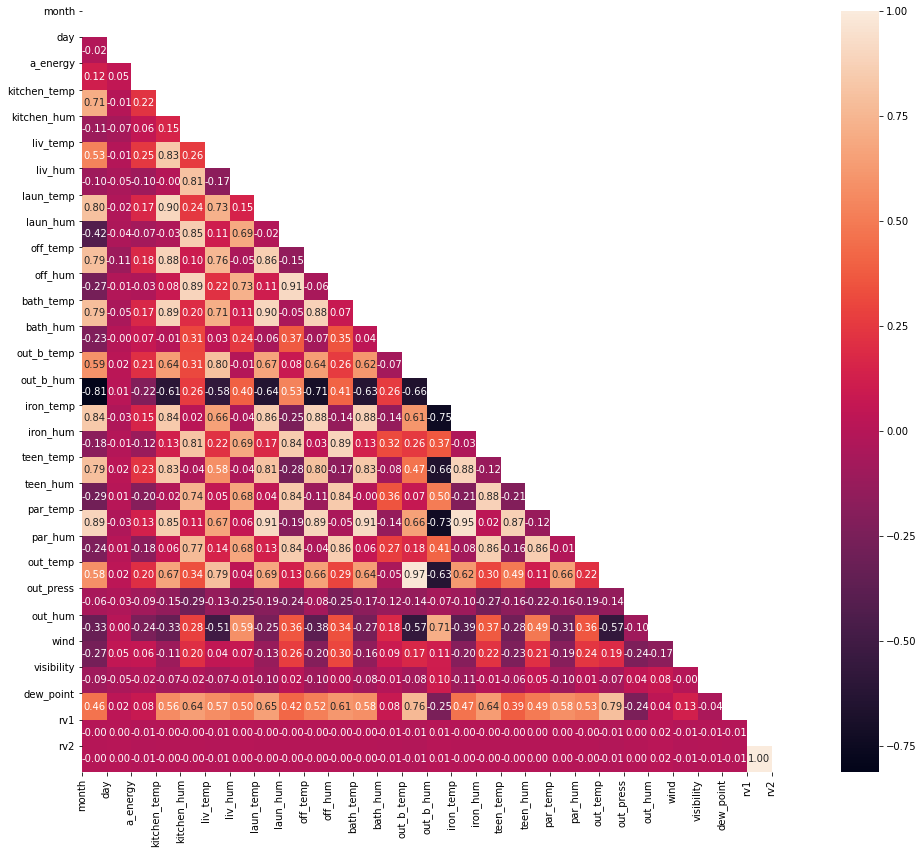

In [129]:
f, ax = plt.subplots(figsize=(16, 14))
sns.heatmap(corr, annot=True, fmt='.2f', mask=mask)
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

From this heatmap, we can see that all the temperature variables have a high positive correlation with a_energy. The outdoor weather attributes seem to have a low correlation, as well as the humidity columns. This means that the temperature has a lot to do with how much the appliances are used. 